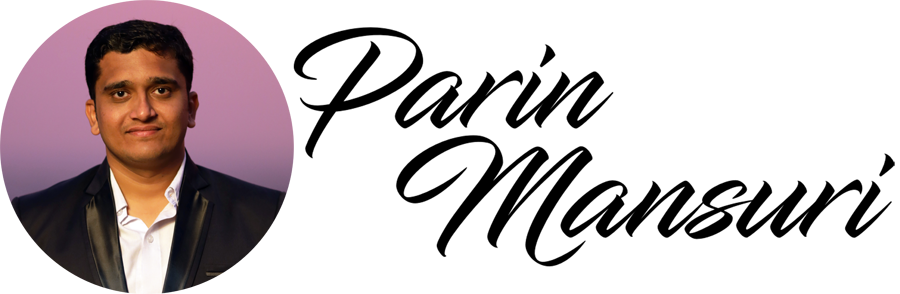

# **Reach Parin on LinkedIn:** www.linkedin.com/in/TheParin

# The Sparks Foundation
# Graduate Rotational Internship Program

# **Data Science & Business Analytics Tasks**


# Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
● Dataset : https://bit.ly/3kXTdox 


![](https://www.macmillandictionary.com/external/slideshow/thumb/iris_thumb.jpg)

# The used Method for uploading file is as below as I used Google Colab:
 
 




In [ ]:
from google.colab import files
uploaded = files.upload()

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [26]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Checking for Null & Missing values

In [27]:

print(iris.isnull().sum())
print(iris.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Checking Data Variables and Data types

In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Statistical measures 

In [29]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# **Data Visualization & Exploratory Data Analysis**

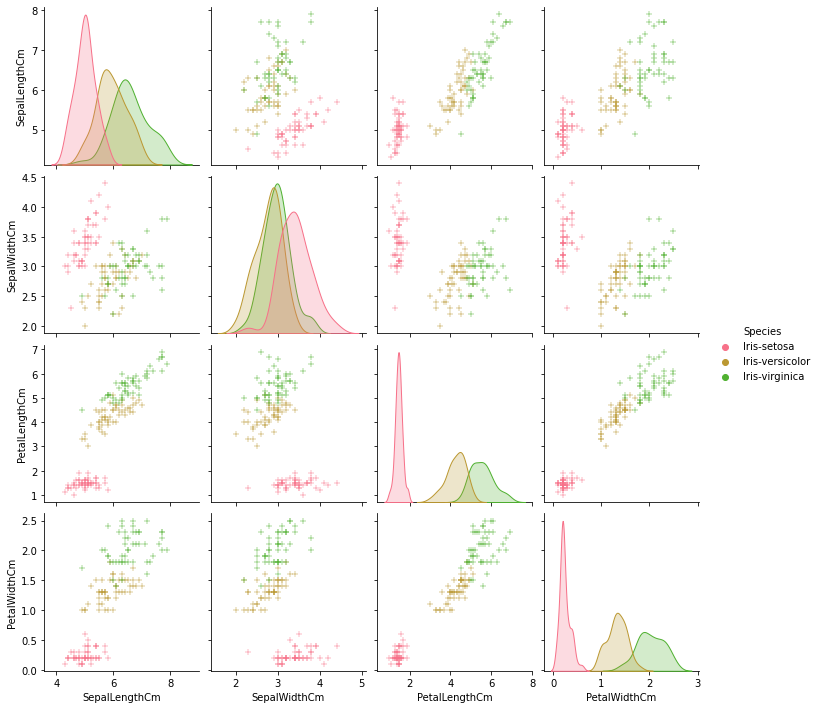

In [31]:
iris_drop = iris.drop('Id', axis=1)
g = sns.pairplot(iris_drop, hue='Species', markers='+')
plt.show()

It is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
Other two has some overlapping features

# **The sepal length and width VS the petal length and width.**
to understand which pair gives us better clustering

# **sepal length and width**

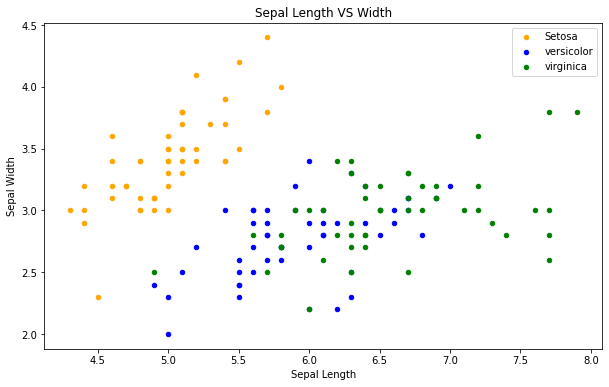

In [32]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# **petal length and width.**

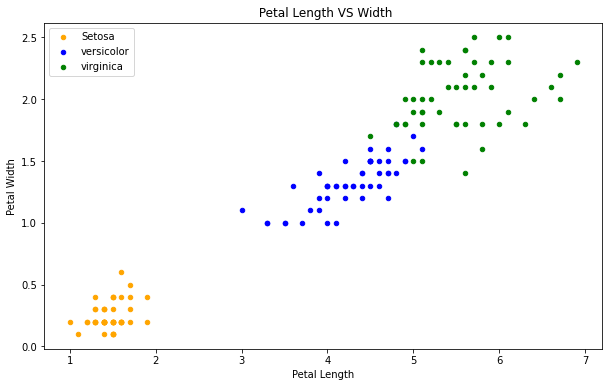

In [33]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.  

**Correlation.**

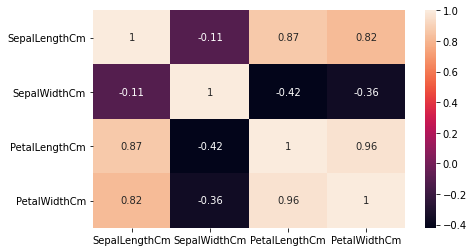

In [34]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_drop.corr(),annot=True) 
plt.show()

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

# **Splitting The Data**

In [35]:
train, test = train_test_split(iris_drop, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [36]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
y_train=train.Species# output of our training data
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
y_test =test.Species   #output value of test data

# **Something Awesome** - 30 Algortihms at Once
**Modeling with 'LazyPredict'**

It runs 30 machine learning models in just a few seconds and gives us a grasp of how models will perform with our dataset. Although, this library will be much useful in other complex algorithms compared to this task

https://towardsdatascience.com/how-to-run-30-machine-learning-models-with-2-lines-of-code-d0f94a537e52

Since this is a classification project, let's import LazyClassifier as well.

In [ ]:

!pip install --upgrade pyforest

import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score



!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

The list above shows which algorith will provide how much accuracy

# **K-Nearest Neighbours**

Checking the accuracy for various values of n for K-Nearest nerighbours and plotting it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


([<matplotlib.axis.XTick at 0x7fb7fd4fcb10>,
 <a list of 10 Text major ticklabel objects>)

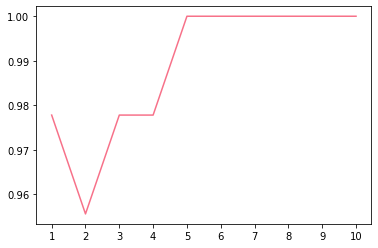

In [37]:



a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

Above is the graph showing the accuracy for the KNN models using different values of n.

**As stated above,**
Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.  
The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated 

Hence, Creating Petals And Sepals Training Data

In [38]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [39]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


**Observations:**

Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
https://www.kaggle.com/ash316/ml-from-scratch-with-iris


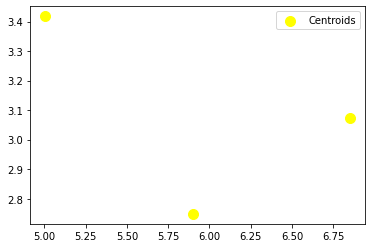

In [40]:
from sklearn.cluster import KMeans
x = iris_drop.iloc[:, [0, 1, 2, 3]].values

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()